<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# Correlation Analysis

1. Pearson
2. Spearman
3. Kendall's Tau

---

## Import Packages
- Visual Python: Data Analysis > Import

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['axes.unicode_minus'] = False

## 1 Correlation Analysis

In [3]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/05_1_상관분석.csv')
df

,외관,편의성,유용성,만족감
0,4.0,3.0,2.8,3.0
1,5.0,3.0,1.0,5.0
2,4.7,3.0,3.0,4.0
3,5.0,4.0,1.6,3.0
4,5.0,3.0,3.2,5.0
...,...,...,...,...
320,1.0,1.5,1.0,1.3
321,4.7,3.8,3.0,3.0
322,1.0,3.0,2.2,2.3
323,5.0,4.5,3.0,5.0


## 1 Correlation Analysis: Pearson

In [4]:
# Visual Python: Correlation Analysis
def vp_confidence_interval_corr(x, y, method='pearson', alpha=0.05):
    try: x=pd.Series(x); y=pd.Series(y)
    except: return np.nan

    corr_func = {'pearson':stats.pearsonr,'spearman':stats.spearmanr,'kendall':stats.kendalltau}
    se_diff   = {'pearson':3,'spearman':3,'kendall':4}
    se_func   = {'pearson': lambda corr: 1,
                 'spearman':lambda corr: 1 + corr ** 2 / 2.,
                 'kendall': lambda corr: .437 }
                     
    corr, pvalue = corr_func[method](x,y)
    
    z  = np.log((1 + corr) / (1 - corr)) / 2
    se = np.sqrt(se_func[method](corr) / (x.size - se_diff[method]))
    
    z_lower = z - stats.norm.ppf(1 - alpha / 2.) * se
    z_upper = z + stats.norm.ppf(1 - alpha / 2.) * se
    
    corr_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
    corr_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)    
    
    return corr, pvalue, corr_lower, corr_upper

### Correlation Analysis: Pearson

,Variable1,Variable2,N,Correlation coefficient,p-value,Lower(95%),Upper(95%)
0,외관,편의성,325,0.191953,5.022492e-04,0.084934,0.294593
1,외관,유용성,325,0.191075,5.334944e-04,0.084030,0.293761
2,외관,만족감,325,0.323864,2.260038e-09,0.222926,0.417931
3,편의성,유용성,325,0.147679,7.660086e-03,0.039522,0.252416
4,편의성,만족감,325,0.368400,6.956390e-12,0.270447,0.458804
5,유용성,만족감,325,0.279981,2.882640e-07,0.176567,0.377281


,외관,편의성,유용성,만족감
외관,1.00,0.19,0.19,0.32
편의성,0.19,1.00,0.15,0.37
유용성,0.19,0.15,1.00,0.28
만족감,0.32,0.37,0.28,1.00


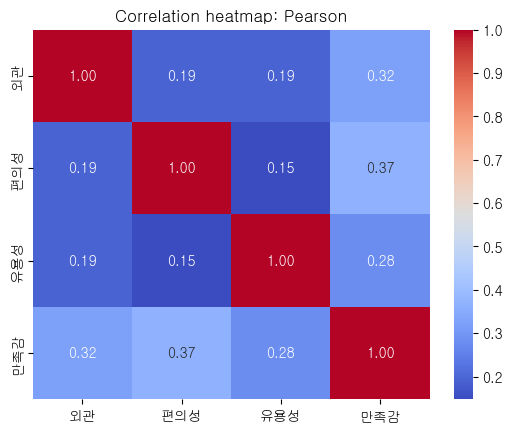

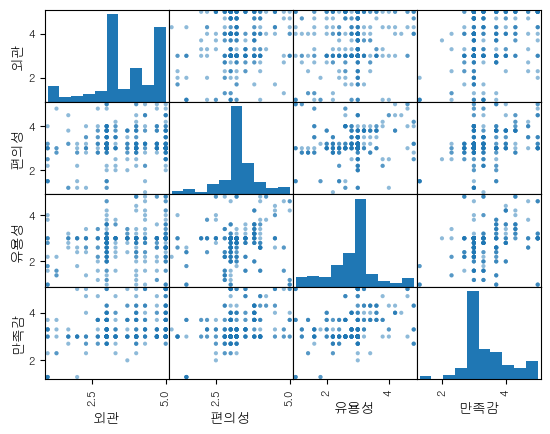

In [5]:
# Visual Python: Correlation Analysis
vp_df = df.dropna().copy()

# Correlation Analysis
from scipy import stats
from IPython.display import display, Markdown
_dfr = pd.DataFrame()
for i, col1 in enumerate(vp_df.columns):
    for j, col2 in enumerate(vp_df.columns):
        if i >= j: continue
        if pd.api.types.is_numeric_dtype(vp_df[col1]) and pd.api.types.is_numeric_dtype(vp_df[col2]):
            _res = vp_confidence_interval_corr(vp_df[col1], vp_df[col2], method='pearson')
            _df_t = pd.DataFrame(data={'Variable1':col1,'Variable2':col2,'N':vp_df[col1].size,'Correlation coefficient':_res[0],
                                   'p-value':_res[1],'Lower(95%)':_res[2],'Upper(95%)':_res[3]}, index=[0])
            _dfr = pd.concat([_dfr, _df_t]).reset_index(drop=True)
display(Markdown('### Correlation Analysis: Pearson'))
display(_dfr)

# Correlation matrix: Pearson
from IPython.display import display
display(vp_df.corr(method='pearson', numeric_only=True).round(2))

# Chart
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)

    # Heatmap
    sns.heatmap(vp_df.corr(method='pearson', numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation heatmap: Pearson')
    plt.show()

    # Scatter matrix
    pd.plotting.scatter_matrix(vp_df)
    plt.show()

## 2 Correlation Analysis: Spearman

In [6]:
# Visual Python: Correlation Analysis
vp_df = df.dropna().copy()

# Correlation Analysis
from scipy import stats
from IPython.display import display, Markdown
_dfr = pd.DataFrame()
for i, col1 in enumerate(vp_df.columns):
    for j, col2 in enumerate(vp_df.columns):
        if i >= j: continue
        if pd.api.types.is_numeric_dtype(vp_df[col1]) and pd.api.types.is_numeric_dtype(vp_df[col2]):
            _res = vp_confidence_interval_corr(vp_df[col1], vp_df[col2], method='spearman')
            _df_t = pd.DataFrame(data={'Variable1':col1,'Variable2':col2,'N':vp_df[col1].size,'Correlation coefficient':_res[0],
                                   'p-value':_res[1],'Lower(95%)':_res[2],'Upper(95%)':_res[3]}, index=[0])
            _dfr = pd.concat([_dfr, _df_t]).reset_index(drop=True)
display(Markdown('### Correlation Analysis: Spearman'))
display(_dfr)

# Correlation matrix: Spearman
from IPython.display import display
display(vp_df.corr(method='spearman', numeric_only=True).round(2))

### Correlation Analysis: Spearman

,Variable1,Variable2,N,Correlation coefficient,p-value,Lower(95%),Upper(95%)
0,외관,편의성,325,0.099319,7.377136e-02,-0.009845,0.206145
1,외관,유용성,325,0.152338,5.926823e-03,0.043649,0.257463
2,외관,만족감,325,0.273129,5.723301e-07,0.167408,0.372640
3,편의성,유용성,325,0.182398,9.554752e-04,0.074197,0.286356
4,편의성,만족감,325,0.321619,2.954016e-09,0.217889,0.418165
5,유용성,만족감,325,0.271749,6.556425e-07,0.165979,0.371338


,외관,편의성,유용성,만족감
외관,1.00,0.10,0.15,0.27
편의성,0.10,1.00,0.18,0.32
유용성,0.15,0.18,1.00,0.27
만족감,0.27,0.32,0.27,1.00


## 3 Correlation Analysis: Kendall's Tau

In [7]:
# Visual Python: Correlation Analysis
vp_df = df.dropna().copy()

# Correlation Analysis
from scipy import stats
from IPython.display import display, Markdown
_dfr = pd.DataFrame()
for i, col1 in enumerate(vp_df.columns):
    for j, col2 in enumerate(vp_df.columns):
        if i >= j: continue
        if pd.api.types.is_numeric_dtype(vp_df[col1]) and pd.api.types.is_numeric_dtype(vp_df[col2]):
            _res = vp_confidence_interval_corr(vp_df[col1], vp_df[col2], method='kendall')
            _df_t = pd.DataFrame(data={'Variable1':col1,'Variable2':col2,'N':vp_df[col1].size,'Correlation coefficient':_res[0],
                                   'p-value':_res[1],'Lower(95%)':_res[2],'Upper(95%)':_res[3]}, index=[0])
            _dfr = pd.concat([_dfr, _df_t]).reset_index(drop=True)
display(Markdown('### Correlation Analysis: Kendall\'s Tau'))
display(_dfr)

# Correlation matrix: Kendall's Tau
from IPython.display import display
display(vp_df.corr(method='kendall', numeric_only=True).round(2))

### Correlation Analysis: Kendall's Tau

,Variable1,Variable2,N,Correlation coefficient,p-value,Lower(95%),Upper(95%)
0,외관,편의성,325,0.075276,7.468994e-02,0.003102,0.146669
1,외관,유용성,325,0.118852,4.963959e-03,0.047065,0.189417
2,외관,만족감,325,0.216324,5.666218e-07,0.146420,0.284078
3,편의성,유용성,325,0.149511,4.166606e-04,0.078164,0.219334
4,편의성,만족감,325,0.256883,2.990312e-09,0.188182,0.323082
5,유용성,만족감,325,0.209892,1.306577e-06,0.139820,0.277872


,외관,편의성,유용성,만족감
외관,1.00,0.08,0.12,0.22
편의성,0.08,1.00,0.15,0.26
유용성,0.12,0.15,1.00,0.21
만족감,0.22,0.26,0.21,1.00


---

In [8]:
# End of file